In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [51]:
def extract(file):
    data = pd.read_csv(file)
    #standard
    data.columns = ['palavra', 'status', 'tempo de execução', 'comparações', 'altura']

    return data

w_in_rbt = extract("../stats/rbt_word_inserts.csv")
w_in_bst = extract("../stats/bst_word_inserts.csv")
w_in_avl = extract("../stats/avl_word_inserts.csv")

search_rbt = extract("../stats/rbt_word_search.csv")
search_bst = extract("../stats/bst_word_search.csv")
search_avl = extract("../stats/avl_word_search.csv")

In [ ]:
def comp_hist(data: pd.DataFrame, column_name: str, rgb, df_name):
    """
    generates a histogram    
    Args:
        data (pd.DataFrame): DataFrame containing the data.
        column_name (str): Name of the column to plot.
        rgb: Color for the histogram bars.
    """
    col_data = data[column_name].dropna()
    min_val = int(col_data.min())
    max_val = int(col_data.max())
    bin_edges = np.arange(min_val - 0.5, max_val + 1.5, 1)


    plt.figure(figsize=(12, 7))
    plt.hist(
        col_data,
        bins=bin_edges,  # Use explicit bin edges
        color=rgb,
        edgecolor='black',
        alpha=0.85
    )
    
    # Add labels and title
    plt.xlabel(column_name.capitalize())
    plt.ylabel("Frequência")
    plt.title(f"Frequências de {column_name.capitalize()} para {df_name}")
    
    plt.tight_layout()
    plt.savefig(f'{df_name, column_name}')
    plt.show()

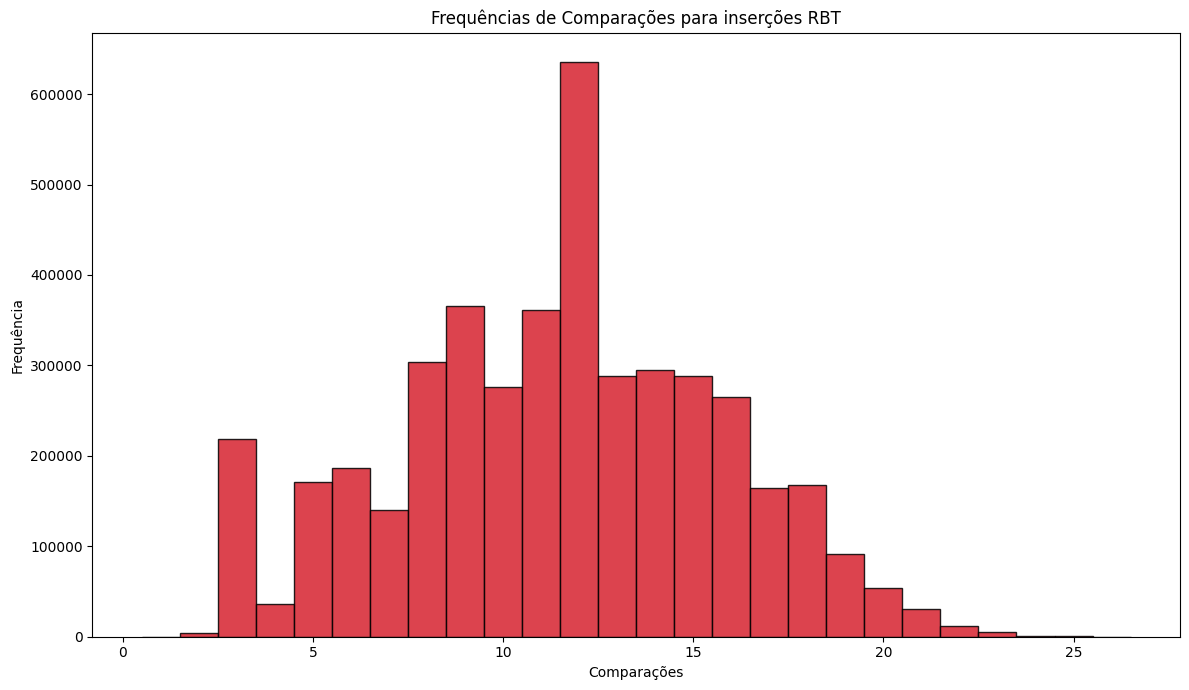

10.826309991317

In [ ]:
comp_hist(w_in_rbt, "comparações", '#d6222f', 'inserções RBT')

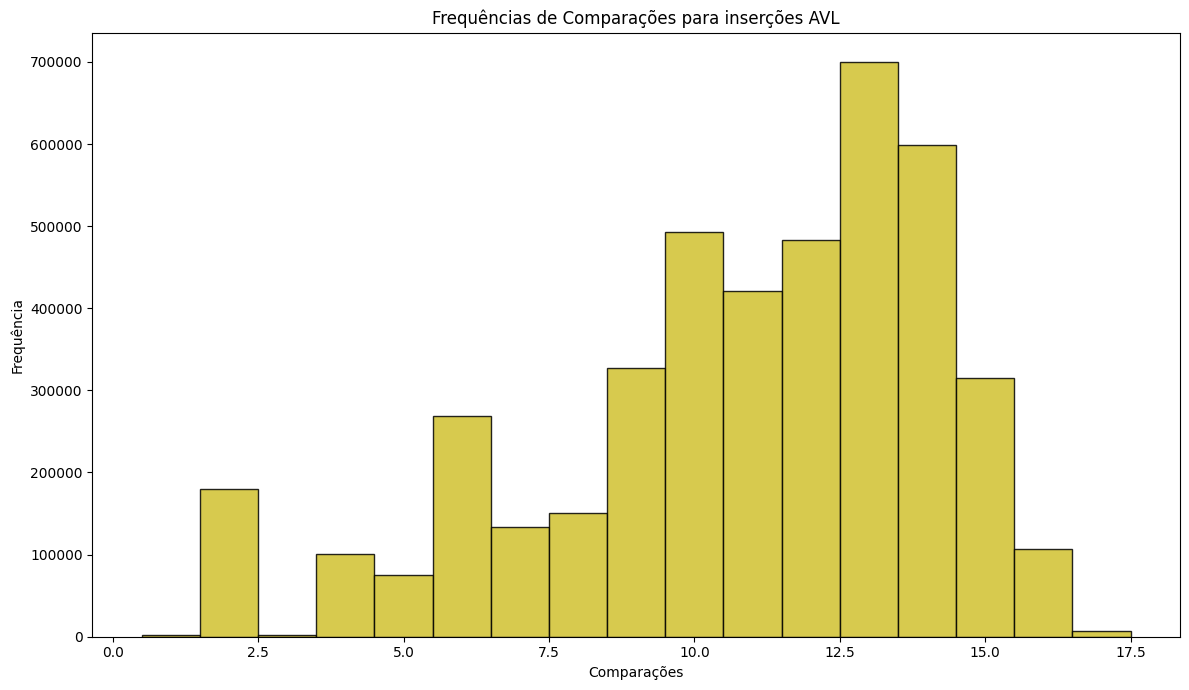

In [55]:
comp_hist(w_in_avl, "comparações", '#d1c12f', 'inserções AVL')

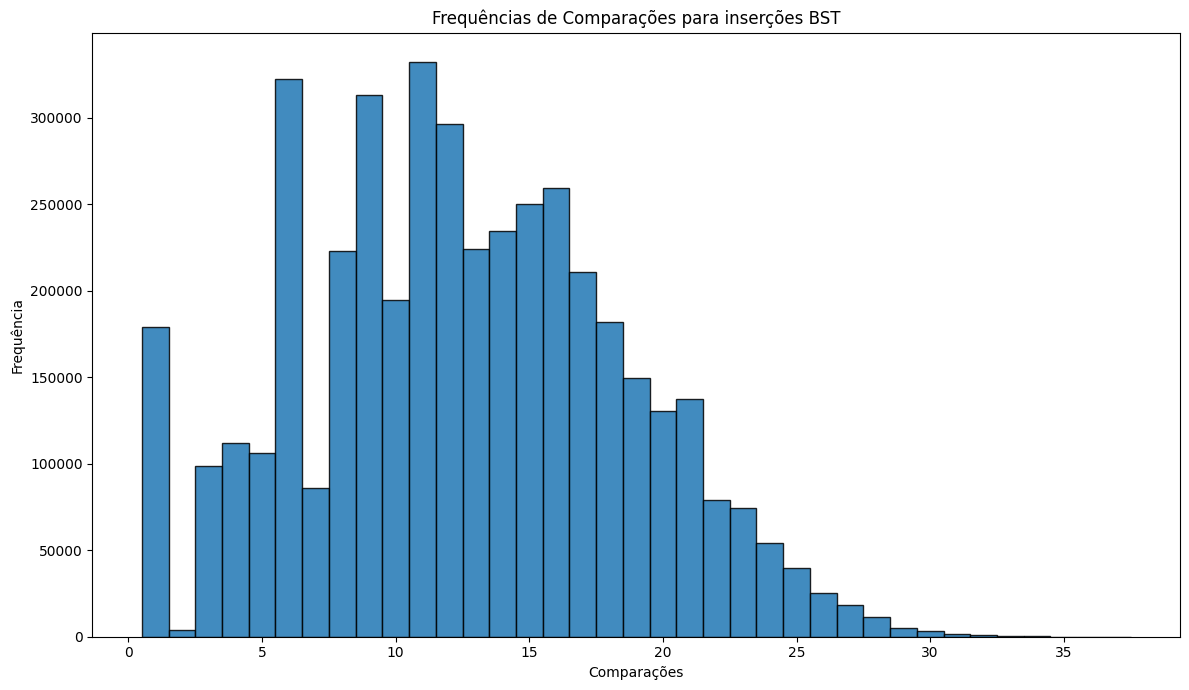

In [56]:
comp_hist(w_in_bst, "comparações", '#1f77b4', 'inserções BST')


In [57]:
# --- Helper Function ---
def get_comp_counts(data, col_name):
    """Calculates and sorts the value counts of the 'comparações' column."""
    comp_counts = data[col_name].value_counts()
    comp_counts.index = comp_counts.index.astype(int)
    comp_counts = comp_counts.sort_index()
    return comp_counts

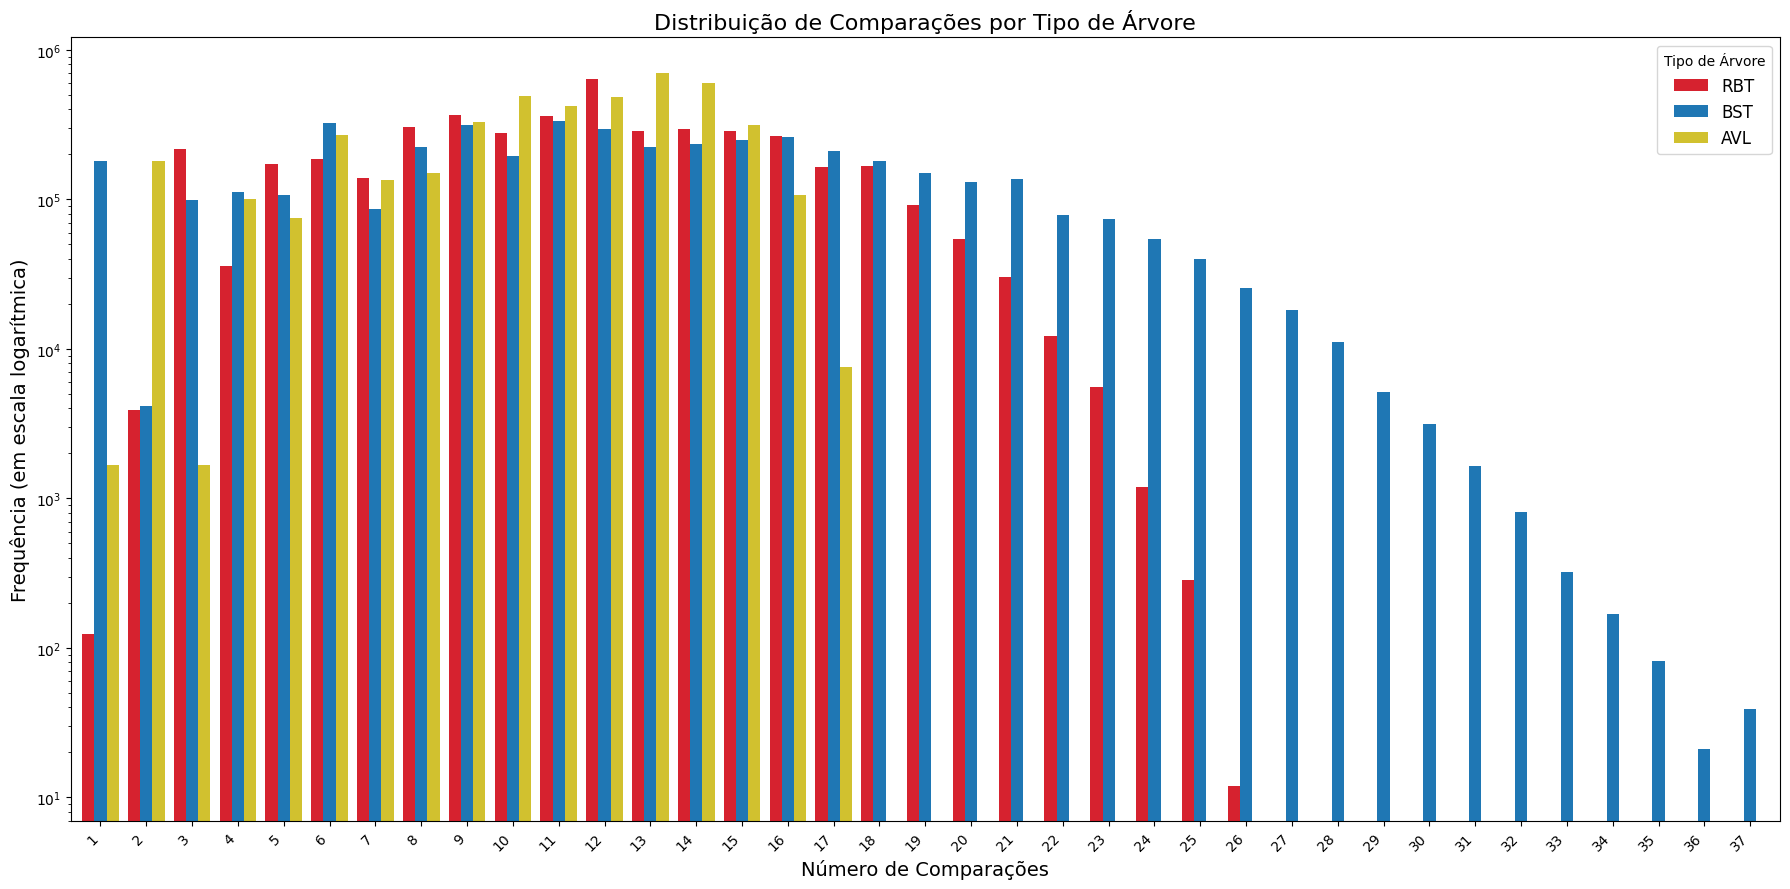

In [58]:
# Get the comparison counts for each tree type from your loaded dataframes
rbt_counts = get_comp_counts(w_in_rbt, "comparações")
bst_counts = get_comp_counts(w_in_bst, "comparações")
avl_counts = get_comp_counts(w_in_avl, "comparações")

# Combine the counts into a single DataFrame for easy plotting
all_counts_df = pd.DataFrame({
    'RBT': rbt_counts,
    'BST': bst_counts,
    'AVL': avl_counts
}).fillna(0).astype(int) # Fill missing comparison counts with 0

# --- Plotting ---
# Create the grouped bar chart
ax = all_counts_df.plot(
    kind='bar',
    figsize=(18, 9),
    width=0.8,
    color=['#d6222f', '#1f77b4', '#d1c12f'] 
)

# --- Formatting the Plot ---
plt.xlabel("Número de Comparações", fontsize=14)
plt.ylabel("Frequência (em escala logarítmica)", fontsize=14)
plt.title("Distribuição de Comparações por Tipo de Árvore", fontsize=16)

# Use a logarithmic scale for the y-axis to better visualize
# the wide range of frequencies.
plt.yscale('log')

plt.xticks(rotation=45, ha='right')
plt.legend(title='Tipo de Árvore', fontsize=12, loc='upper right')
plt.tight_layout()

# Display the final graph
plt.show()

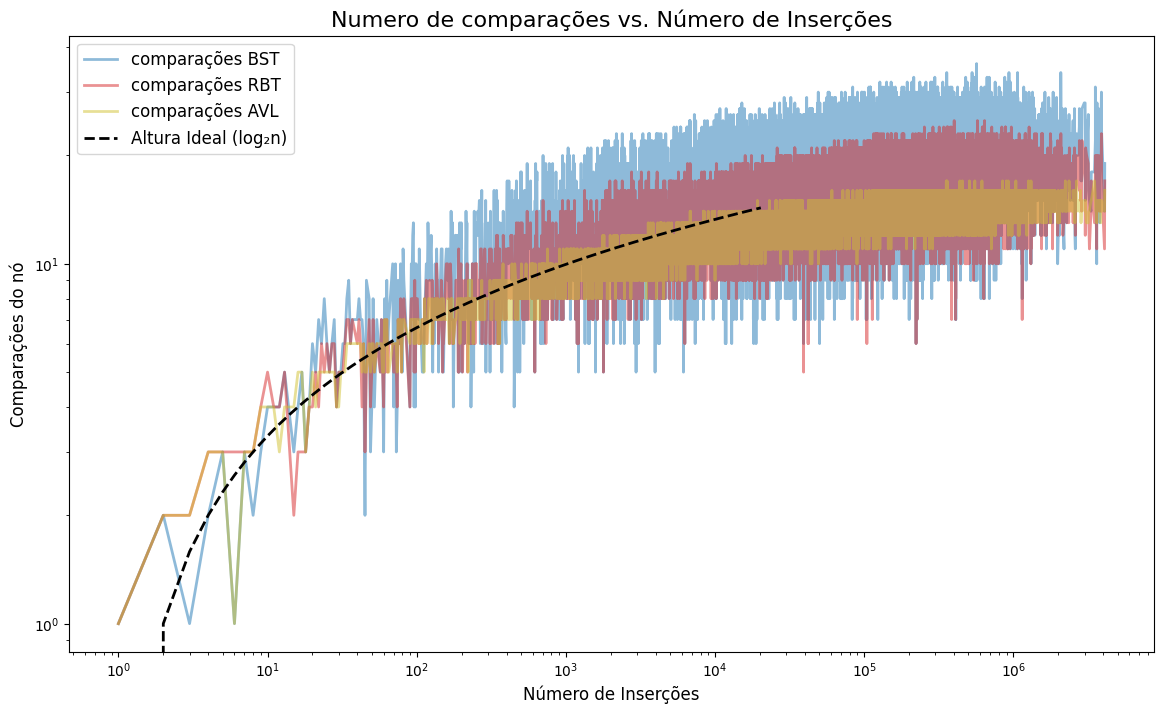

In [69]:
# --- Create an 'insertions' column for the x-axis ---
# The number of insertions is simply the row number (plus 1)
w_in_rbt['inserções'] = np.arange(1, len(w_in_rbt) + 1)
w_in_bst['inserções'] = np.arange(1, len(w_in_bst) + 1)
w_in_avl['inserções'] = np.arange(1, len(w_in_avl) + 1)

# --- Calculate the theoretical best-case height ---
# Use the number of insertions from the largest dataset for the x-axis
copy_rbt = w_in_rbt.drop_duplicates(subset='palavra')
copy_bst = w_in_bst.drop_duplicates(subset='palavra')
copy_avl = w_in_avl.drop_duplicates(subset='palavra')

n = max(len(copy_rbt), len(copy_bst), len(copy_avl))
x_axis = np.arange(1, n + 1)

# The ideal height of a balanced tree is log base 2 of n
ideal_height = np.log2(x_axis)

# --- Create the Plot ---
plt.figure(figsize=(14, 8))

# Plot the height of each of your trees
plt.plot(copy_bst['inserções'], copy_bst['comparações'], label='comparações BST', color='#1f77b4', linewidth=2, alpha = 0.5)
plt.plot(copy_rbt['inserções'], copy_rbt['comparações'], label='comparações RBT', color='#d62728', linewidth=2, alpha = 0.5)
plt.plot(copy_avl['inserções'], copy_avl['comparações'], label='comparações AVL', color='#d1c12f', linewidth=2, alpha=0.5)

# Plot the ideal logarithmic height for comparison
plt.plot(x_axis, ideal_height, label='Altura Ideal (log₂n)', color='black', linestyle='--', linewidth=2)

# --- Formatting the Plot ---
plt.title('Numero de comparações vs. Número de Inserções', fontsize=16)
plt.xlabel('Número de Inserções', fontsize=12)
plt.ylabel('Comparações do nó', fontsize=12)
plt.legend(fontsize=12, loc = 'upper left')
plt.xscale('log') # Use a log scale on the x-axis to see the full range of insertions
plt.yscale('log')
# plt.savefig('balanceamento.png')
plt.show()


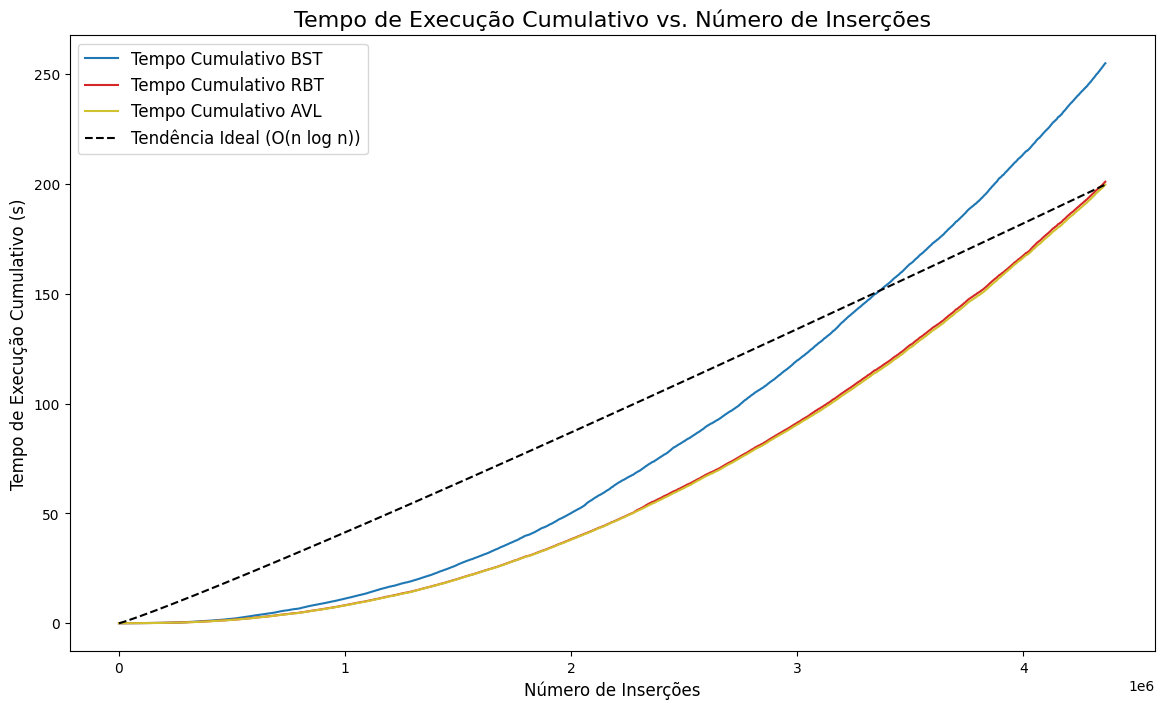

In [61]:
# --- Calculate Cumulative Running Time ---
# Use .cumsum() to get the sum of execution time as it accumulates
w_in_rbt['tempo_cumulativo'] = w_in_rbt['tempo de execução'].cumsum()
w_in_bst['tempo_cumulativo'] = w_in_bst['tempo de execução'].cumsum()
w_in_avl['tempo_cumulativo'] = w_in_avl['tempo de execução'].cumsum()

# --- Create an 'insertions' column for the x-axis ---
w_in_rbt['inserções'] = np.arange(1, len(w_in_rbt) + 1)
w_in_bst['inserções'] = np.arange(1, len(w_in_bst) + 1)
w_in_avl['inserções'] = np.arange(1, len(w_in_avl) + 1)

# --- Calculate the theoretical O(n log n) curve ---
# Use the number of insertions from the largest dataset
n = max(len(w_in_rbt), len(w_in_bst), len(w_in_avl))
x_axis = np.arange(1, n + 1)

# Calculate a scaled n*log(n).
last_avl_time = w_in_avl['tempo_cumulativo'].iloc[-1]
last_n_log_n = n * np.log2(n)
scaling_factor = last_avl_time / last_n_log_n

# The ideal O(n log n) trend line, scaled to your data
n_log_n_trend = scaling_factor * (x_axis * np.log2(x_axis))


# --- Create the Plot ---
plt.figure(figsize=(14, 8))

# Plot the cumulative running time for each tree
plt.plot(w_in_bst['inserções'], w_in_bst['tempo_cumulativo'], label='Tempo Cumulativo BST', color='#1f77b4')
plt.plot(w_in_rbt['inserções'], w_in_rbt['tempo_cumulativo'], label='Tempo Cumulativo RBT', color='#d62728')
plt.plot(w_in_avl['inserções'], w_in_avl['tempo_cumulativo'], label='Tempo Cumulativo AVL', color='#d1c12f')

# Plot the ideal O(n log n) trend line for comparison
plt.plot(x_axis, n_log_n_trend, label='Tendência Ideal (O(n log n))', color='black', linestyle='--')


# --- Formatting the Plot ---
plt.title('Tempo de Execução Cumulativo vs. Número de Inserções', fontsize=16)
plt.xlabel('Número de Inserções', fontsize=12)
plt.ylabel('Tempo de Execução Cumulativo (s)', fontsize=12)
plt.legend(fontsize=12, loc='upper left')

plt.savefig('tempos_de_execução.png')
plt.show()


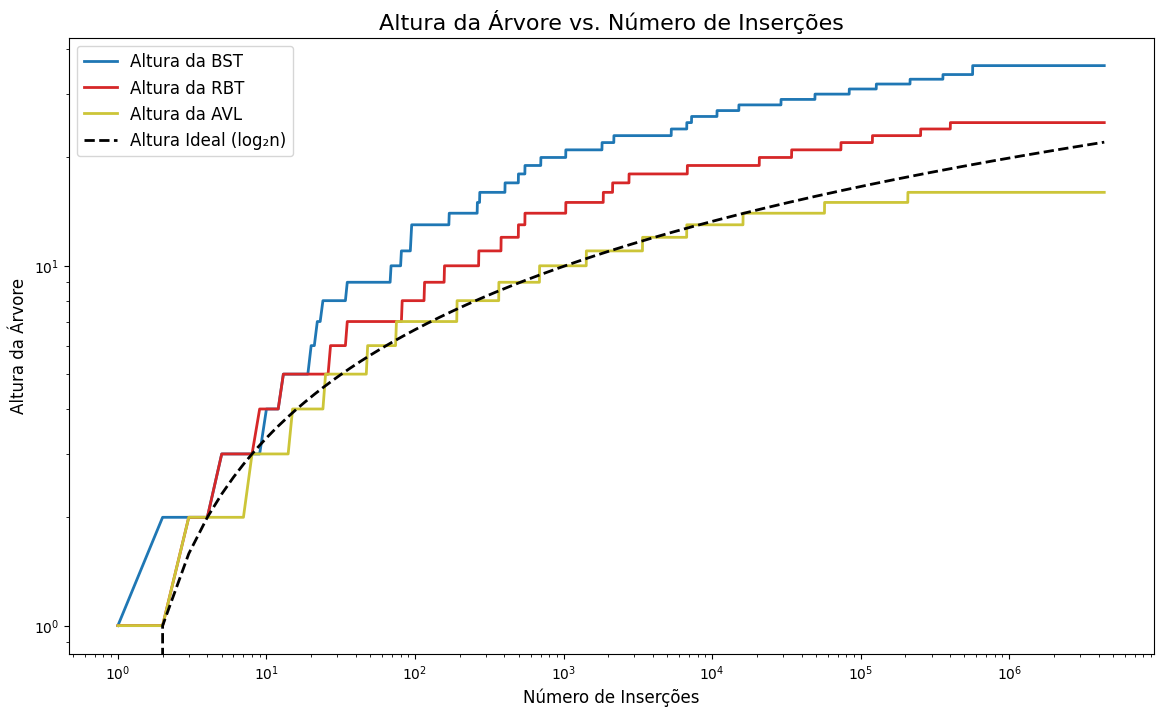

In [ ]:
w_in_rbt['inserções'] = np.arange(1, len(w_in_rbt) + 1)
w_in_bst['inserções'] = np.arange(1, len(w_in_bst) + 1)
w_in_avl['inserções'] = np.arange(1, len(w_in_avl) + 1)

# --- Calculate the theoretical best-case height ---
# Use the number of insertions from the largest dataset for the x-axis
n = max(len(w_in_rbt), len(w_in_bst), len(w_in_avl))
x_axis = np.arange(1, n + 1)


# The ideal height of a balanced tree is log base 2 of n
ideal_height = np.log2(x_axis)

# --- Create the Plot ---
plt.figure(figsize=(14, 8))

# Plot the height of each of your trees
plt.plot(w_in_bst['inserções'], w_in_bst['altura'], label='Altura da BST', color='#1f77b4', linewidth=2)
plt.plot(w_in_rbt['inserções'], w_in_rbt['altura'], label='Altura da RBT', color='#d62728', linewidth=2)
plt.plot(w_in_avl['inserções'], w_in_avl['altura'], label='Altura da AVL', color='#ccc538', linewidth=2)

# Plot the ideal logarithmic height for comparison
plt.plot(x_axis, ideal_height, label='Altura Ideal (log₂n)', color='black', linestyle='--', linewidth=2)


# --- Formatting the Plot ---
plt.title('Altura da Árvore vs. Número de Inserções', fontsize=16)
plt.xlabel('Número de Inserções', fontsize=12)
plt.ylabel('Altura da Árvore', fontsize=12)
plt.legend(fontsize=12, loc = "upper left")
plt.xscale('log') # Use a log scale on the x-axis to see the full range of insertions
plt.yscale('log') # Use a log scale on the y-axis to better see height differences

plt.savefig('balanceamento')
plt.show()